In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Part-1 Loading of Dataset in Collab

In [ ]:
!wget http://vis-www.cs.umass.edu/lfw/lfw.tgz
!tar -xvf /content/lfw.tgz

Streaming output truncated to the last 5000 lines.
lfw/Luis_Sanchez/
lfw/Luis_Sanchez/Luis_Sanchez_0001.jpg
lfw/Juliette_Binoche/
lfw/Juliette_Binoche/Juliette_Binoche_0001.jpg
lfw/Joel_Todd/
lfw/Joel_Todd/Joel_Todd_0001.jpg
lfw/Allan_Wagner/
lfw/Allan_Wagner/Allan_Wagner_0001.jpg
lfw/Alejandro_Fernandez/
lfw/Alejandro_Fernandez/Alejandro_Fernandez_0001.jpg
lfw/Guillaume_Depardieu/
lfw/Guillaume_Depardieu/Guillaume_Depardieu_0001.jpg
lfw/Delphine_Chuillot/
lfw/Delphine_Chuillot/Delphine_Chuillot_0001.jpg
lfw/Paul_LeClerc/
lfw/Paul_LeClerc/Paul_LeClerc_0001.jpg
lfw/Eddie_Jordan/
lfw/Eddie_Jordan/Eddie_Jordan_0001.jpg
lfw/Lionel_Richie/
lfw/Lionel_Richie/Lionel_Richie_0001.jpg
lfw/Lionel_Richie/Lionel_Richie_0002.jpg
lfw/Jose_Viegas_Filho/
lfw/Jose_Viegas_Filho/Jose_Viegas_Filho_0001.jpg
lfw/Jose_Viegas_Filho/Jose_Viegas_Filho_0002.jpg
lfw/Roger_Mahony/
lfw/Roger_Mahony/Roger_Mahony_0001.jpg
lfw/Clay_Aiken/
lfw/Clay_Aiken/Clay_Aiken_0001.jpg
lfw/Clay_Aiken/Clay_Aiken_0002.jpg
lfw/Clay_Ai

## Part-2 Using CNN for Feature Extraction

### Preprocessing

In [ ]:
import os
import numpy as np
#Using Tensoflow Keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

# Define the ResNet50 model
model = ResNet50(weights='imagenet', include_top=False)

# Define the function to extract features from a single image
def extract_features(image_path, model):
    # Load and preprocess the image
    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    image_array = preprocess_input(image_array)

    # Extract the features using the ResNet50 model
    features = model.predict(image_array.reshape(1, 224, 224, 3))
    
    # Flatten the features and return them as a 1D array
    features = features.flatten()
    return features

# Define the folder path containing the images
folder_path = '/content/lfw'

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
import tensorflow as tf 
print(tf.__version__)

2.12.0


In [ ]:
#We have these many persons,i.e the number of folders
import os
base_root = '/content/lfw'
folders = os.listdir(base_root)
print(len(folders))

5749


In [ ]:
#Creating dictionary containing all the images with key as person they belong to
final_image_paths = {}
for folder in folders:
  files = os.listdir(os.path.join(base_root, folder))
  for file in files:
    final_image_paths[os.path.join(base_root, folder, file)] = folder

In [ ]:
#total number of images are
len(final_image_paths)

13233

### Storing Feature Vectors of Image in Dictionary

In [ ]:
# Creating a Test test of Images as number of images is too large
import random
def get_random_images(dictionary, x):
    keys = list(dictionary.keys())
    random_keys = random.sample(keys, x)
    return random_keys

In [ ]:
#Create a test set of size 50
test_set=get_random_images(final_image_paths, 50)

In [ ]:
len(test_set)

50

In [ ]:
image_dict = {}
for index,image_file_path in enumerate(test_set):
    image_features = extract_features(image_file_path, model)
    image_dict[image_file_path]=image_features
    print(image_file_path,"==> extracted")  

1/1 [==============================] - 0s 218ms/step
/content/lfw/Shimon_Peres/Shimon_Peres_0006.jpg ==> extracted
1/1 [==============================] - 0s 221ms/step
/content/lfw/Cherie_Blair/Cherie_Blair_0004.jpg ==> extracted
1/1 [==============================] - 0s 225ms/step
/content/lfw/John_Jones/John_Jones_0001.jpg ==> extracted
1/1 [==============================] - 0s 205ms/step
/content/lfw/Lynn_Redgrave/Lynn_Redgrave_0002.jpg ==> extracted
1/1 [==============================] - 0s 204ms/step
/content/lfw/Hal_Gehman/Hal_Gehman_0002.jpg ==> extracted
1/1 [==============================] - 0s 203ms/step
/content/lfw/Gao_Qiang/Gao_Qiang_0001.jpg ==> extracted
1/1 [==============================] - 0s 216ms/step
/content/lfw/Jennifer_Garner/Jennifer_Garner_0007.jpg ==> extracted
1/1 [==============================] - 0s 206ms/step
/content/lfw/Christiane_Wulff/Christiane_Wulff_0001.jpg ==> extracted
1/1 [==============================] - 0s 203ms/step
/content/lfw/Nestor_Kirch

In [ ]:
#show the feature dictionary
image_dict

{'/content/lfw/Shimon_Peres/Shimon_Peres_0006.jpg': array([0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        1.5217301], dtype=float32),
 '/content/lfw/Cherie_Blair/Cherie_Blair_0004.jpg': array([0.       , 0.       , 0.       , ..., 1.2286326, 0.       ,
        2.626698 ], dtype=float32),
 '/content/lfw/John_Jones/John_Jones_0001.jpg': array([0.        , 0.        , 0.        , ..., 0.07471114, 0.        ,
        0.        ], dtype=float32),
 '/content/lfw/Lynn_Redgrave/Lynn_Redgrave_0002.jpg': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 '/content/lfw/Hal_Gehman/Hal_Gehman_0002.jpg': array([0.        , 0.22089213, 0.        , ..., 0.        , 0.        ,
        0.        ], dtype=float32),
 '/content/lfw/Gao_Qiang/Gao_Qiang_0001.jpg': array([0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        1.5016574], dtype=float32),
 '/content/lfw/Jennifer_Garner/Jennifer_Garner_0007.jpg': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 '/conten

In [ ]:
#store the dictionary
np.save("features.npy",image_dict)

In [ ]:
#directory to save test images
!mkdir test_images

mkdir: cannot create directory ‘test_images’: File exists


In [ ]:
import shutil

#make a directory and save the test images
new_folder_path = "/content/test_images/"

# Loop through the image paths and copy each image to the new folder
for path in test_set:
    # Get the filename from the path
    filename = os.path.basename(path)
    # Construct the new path by joining the new folder path and the filename
    new_path = os.path.join(new_folder_path, filename)
    # Copy the file from the original folder to the new folder
    shutil.copyfile(path, new_path)

In [ ]:
# zip the test directory
!zip -r /content/file.zip /content/test_images

updating: content/test_images/ (stored 0%)
updating: content/test_images/Ann_Veneman_0005.jpg (deflated 1%)
updating: content/test_images/Yoriko_Kawaguchi_0001.jpg (deflated 1%)
updating: content/test_images/Nanni_Moretti_0002.jpg (deflated 1%)
updating: content/test_images/John_Snow_0015.jpg (deflated 2%)
updating: content/test_images/Megan_Mullally_0002.jpg (deflated 1%)
updating: content/test_images/Mike_Martz_0006.jpg (deflated 2%)
updating: content/test_images/Frank_Cassell_0002.jpg (deflated 6%)
updating: content/test_images/George_W_Bush_0286.jpg (deflated 1%)
updating: content/test_images/Kay_Behrensmeyer_0001.jpg (deflated 1%)
updating: content/test_images/Vladimir_Putin_0022.jpg (deflated 1%)
updating: content/test_images/Trent_Lott_0007.jpg (deflated 1%)
updating: content/test_images/Junichiro_Koizumi_0013.jpg (deflated 1%)
updating: content/test_images/John_Wright_0001.jpg (deflated 2%)
updating: content/test_images/Kofi_Annan_0020.jpg (deflated 1%)
updating: content/test_i

In [ ]:
#download it for putting it into deployment
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#size in mb
file_size = os.path.getsize("/content/features.npy")
print("features dict size ==> ",file_size/1048576)

features dict size ==>  19.14600658416748


In [ ]:
files.download("/content/features.npy")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Part-3 Retreiving most similar Images using KNN

In [ ]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from sklearn.neighbors import NearestNeighbors

In [ ]:
len(image_dict)

50

In [ ]:
list(image_dict.values())[0].shape

(100352,)

1/1 [==============================] - 0s 219ms/step
Test Image is ==> 


Text(0.5, 1.0, '/content/lfw/AJ_Cook/AJ_Cook_0001.jpg')

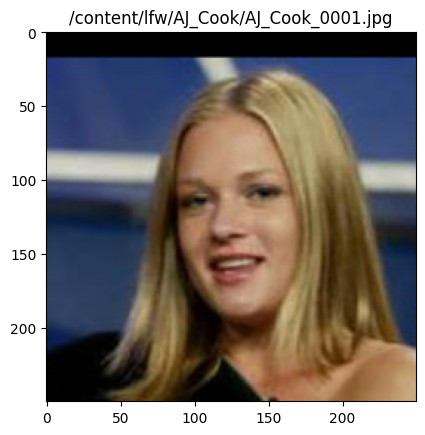

In [ ]:
# Load the features dictionary from disk
with open("/content/features.npy", "rb") as f:
    features_dict = np.load(f, allow_pickle=True).item()

# Fit a nearest neighbor model on the features
nn_model = NearestNeighbors(n_neighbors=10, metric='cosine')

# Convert the dictionary to a matrix of feature vectors
features_list = np.array(list(image_dict.values()))

# Fit the model to the feature matrix
nn_model.fit(features_list)

# Define the file path to the test image
test_image_path = "/content/lfw/AJ_Cook/AJ_Cook_0001.jpg"

# Extract features from the test image

test_image_features = extract_features(test_image_path, model)

# Reshape the test image features to match the shape of the feature vectors
test_image_features = test_image_features.reshape(1, -1)

# # Find the 10 most similar images to the test image
distances, indices = nn_model.kneighbors(test_image_features)

print("Test Image is ==> ")
test_img=mpimg.imread(test_image_path)
plt.imshow(test_img)
plt.title(test_image_path)

10 Most Similar Images as follows ==> 


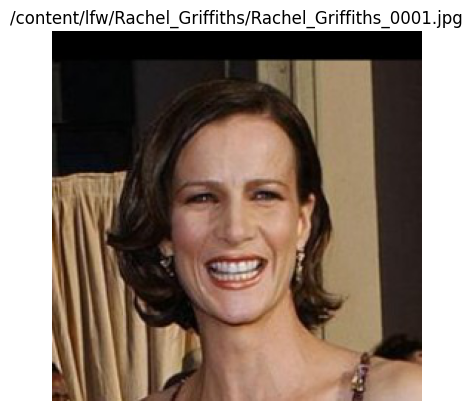

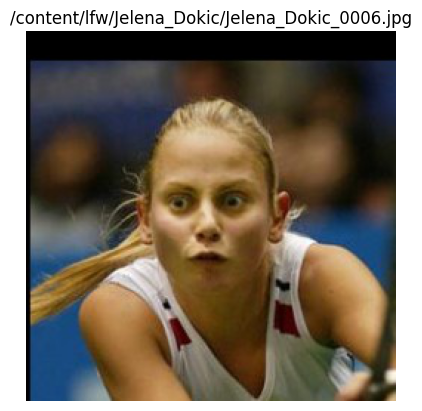

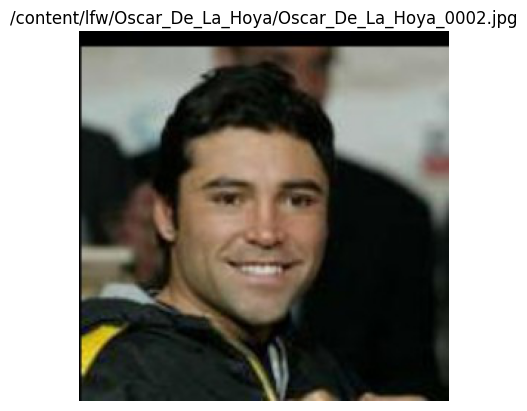

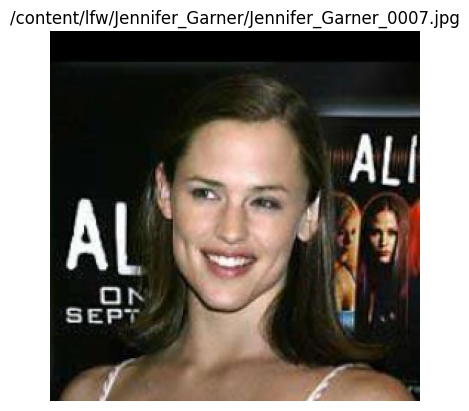

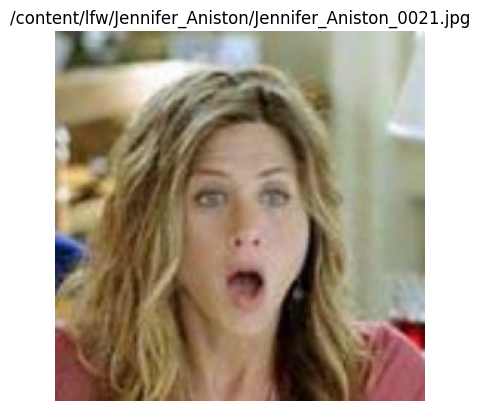

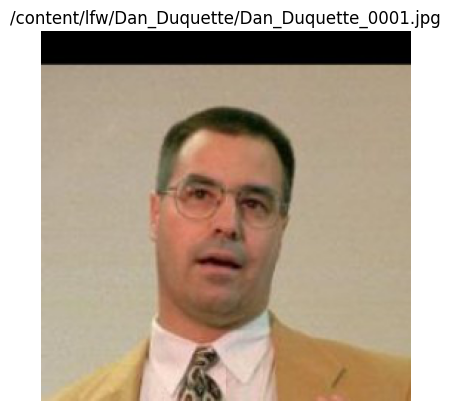

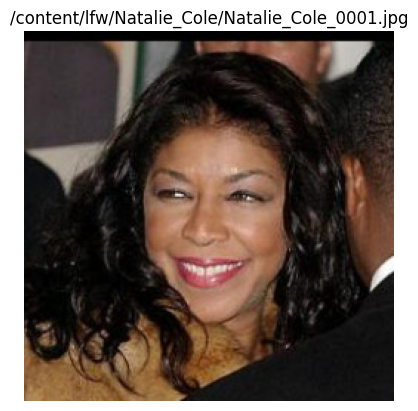

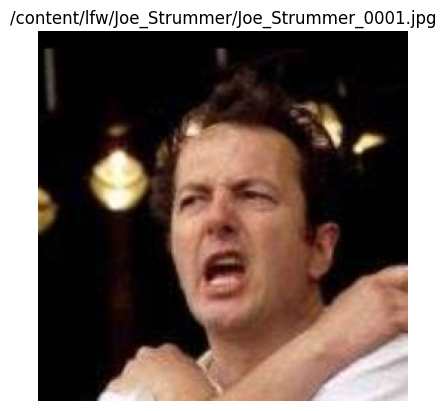

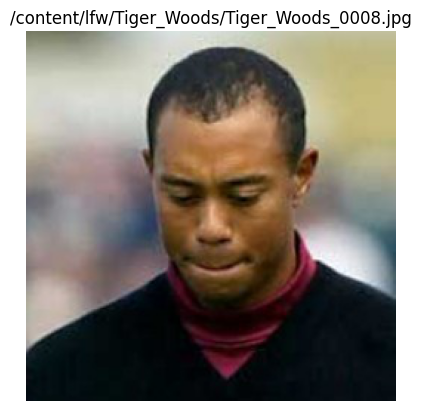

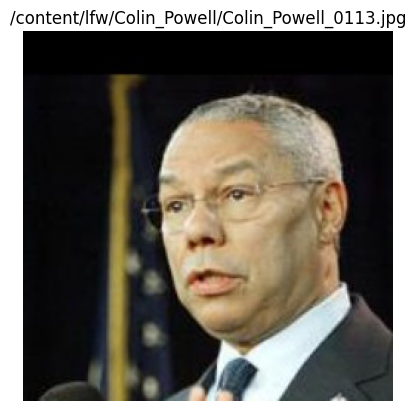

In [ ]:
print("10 Most Similar Images as follows ==> ")
# # Print the paths to the most similar images
for i in indices[0]:
    path=(list(features_dict.keys())[i])
    img=mpimg.imread(path)
    # Display the image using the imshow() function from Matplotlib
    plt.imshow(img)

    # Add a title to the image
    plt.title(path)

    # Turn off axis ticks and labels
    plt.axis('off')

    # Show the image
    plt.show()